In [1]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import time
import numpy as np
import skimage
from skimage import exposure
from dataset.transform import *
from dataset.utils import *
from utils import *
import face_recognition
import pickle

Files already downloaded and verified


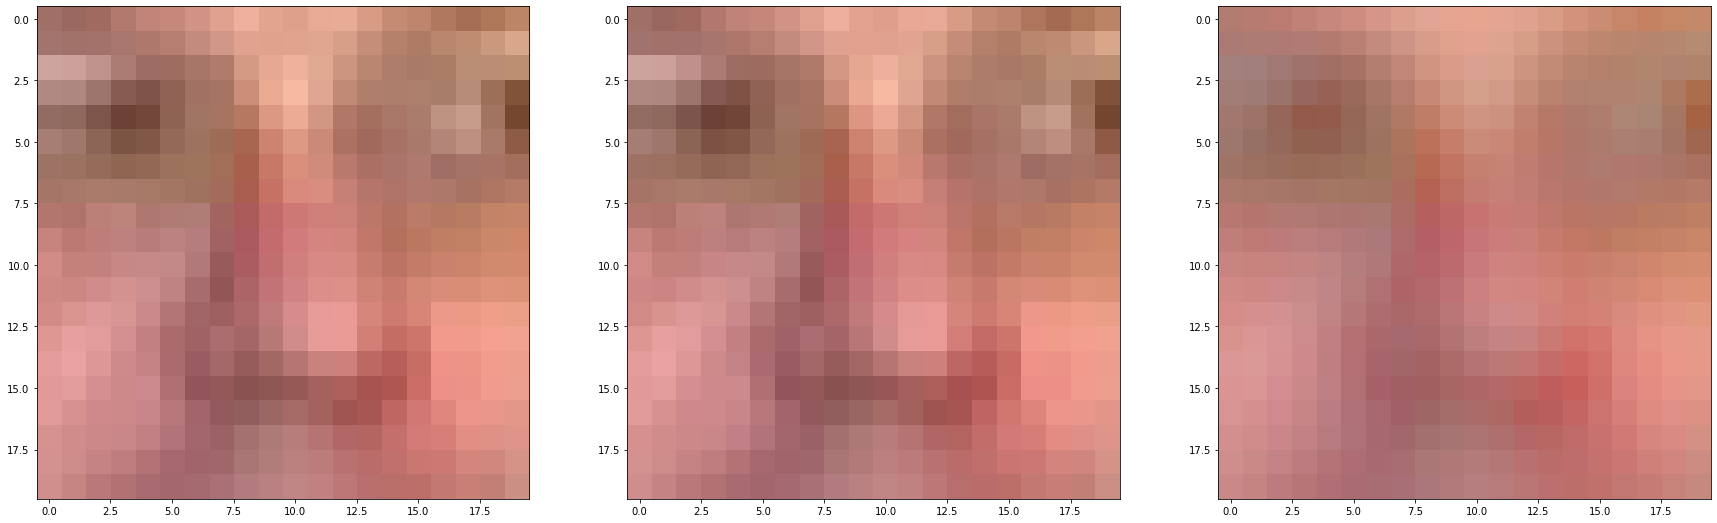

In [27]:
dataset = make_dataset('LFW', face_detection=False,split='10fold',image_size=100)
image_file = Image.open(dataset.data[np.random.randint(len(dataset))])
# image_file = Image.open('../CelebA-Example-8x9.png').convert('RGB')
# o=time.time()
# FaceDetectionCrop()(transforms.Resize(100)(image_file))
# print(time.time()-o)
# o=time.time()
# FaceDetectionCrop()(image_file)
# print(time.time()-o)
f,ax=plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(transforms.CenterCrop(20)(image_file))
# ax[1].imshow(UnsharpFilter(radius=1,amount=1)(image_file))
# ax[2].imshow(UnsharpFilter(radius=5,amount=1)(image_file))

ax[1].imshow(transforms.CenterCrop(20)(ToImage()(MeanFilter(size=1)(image_file))))
ax[2].imshow(transforms.CenterCrop(20)(ToImage()(MeanFilter(size=5)(image_file))))

# ax[1].imshow(MedianFilter(size=3)(image_file))
# ax[2].imshow(MedianFilter(size=10)(image_file))

# ax[1].imshow(MedianFilter(size=5)(image_file))
# ax[2].imshow(-(np.array(image_file)-np.array(ToPILImage()(ToTensor()(MedianFilter(size=5)(image_file))))))

# ax[1].imshow(GaussianBlur(sigma=1)(image_file))
# ax[2].imshow(GaussianBlur(sigma=3)(image_file))

# ax[1].imshow(AdjustLog(gain=1)(image_file))
# ax[2].imshow(AdjustLog(gain=.5)(image_file))

# ax[1].imshow(MeanUnsharpFilter(size=3)(image_file))
# ax[2].imshow(MeanUnsharpFilter(size=5)(np.array(image_file)))

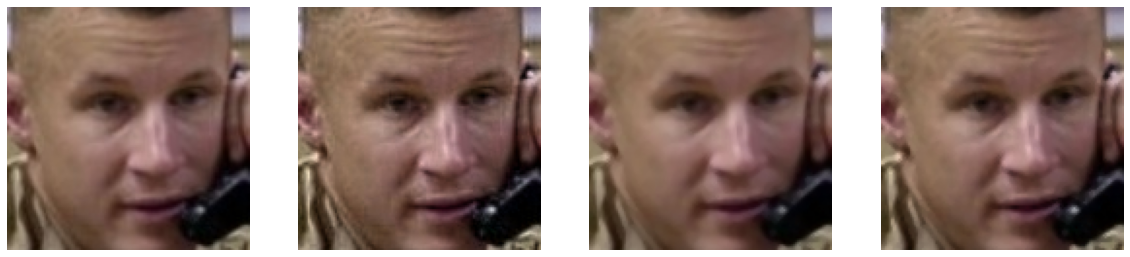

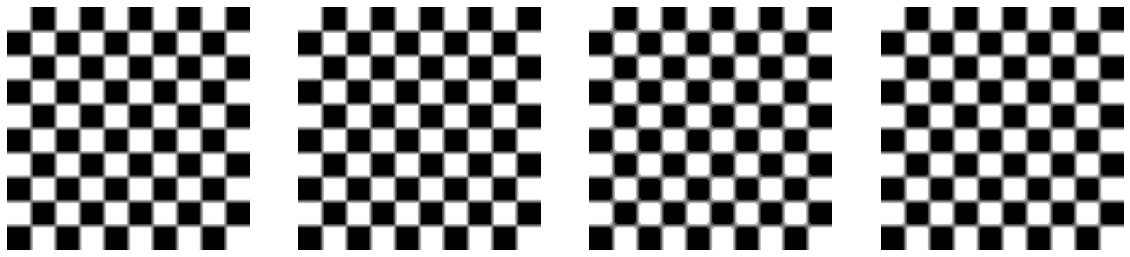

In [126]:
### dataset = make_dataset('LFW', face_detection=False,split='10fold',image_size=100)
image_file = Image.open(dataset.data[np.random.randint(len(dataset))])
image_file = transforms.CenterCrop(125)(image_file)
x,y=4,1
img_len=5
musize,muamount,msize=5,1,3
f,ax=plt.subplots(y,x,figsize=(img_len*x,img_len*y))
ax[0].imshow(image_file)
ax[1].imshow(MedianUnsharpFilter(size=musize,amount=muamount)(image_file))
ax[2].imshow(MedianHSVFilter(method='sv', size=msize)(image_file))
ax[3].imshow(MedianHSVFilter(method='sv', size=msize)(MedianUnsharpFilter(size=musize,amount=muamount)(image_file)))
[i.set_axis_off() for i in ax]
plt.show()
fields = int(10/2)
size = 5
binary_image = np.kron([[1, 0] * fields, [0, 1] * fields] * fields, np.ones((size, size)))
comp=transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.Resize(150)
])

image_file = comp(np.stack((binary_image, binary_image, binary_image), axis=-1))
f,ax=plt.subplots(y,x,figsize=(img_len*x,img_len*y))
ax[0].imshow(image_file)
ax[1].imshow(MedianUnsharpFilter(size=musize,amount=muamount)(image_file))
ax[2].imshow(MedianHSVFilter(method='sv', size=msize)(image_file))
ax[3].imshow(MedianHSVFilter(method='sv', size=msize)(MedianUnsharpFilter(size=musize,amount=muamount)(image_file)))
[i.set_axis_off() for i in ax]
plt.show()

In [ ]:

# If required, create a face detection pipeline using MTCNN:
dataset = make_dataset('LFWCustom', face_detection=False,split='10fold',image_size=100)
mtcnn = MTCNN(device='cuda')
# image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0001.jpg')
image_file = Image.open(dataset.file_paths[np.random.randint(len(dataset))])
img = image_file.convert('RGB')
# img = transforms.functional.adjust_contrast(transforms.functional.adjust_brightness(img,.1),.4)

# Get cropped and prewhitened image tensor
then=time.time()
img_cropped = FaceDetectionCrop()(img)
time.time()-then

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


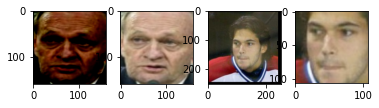

In [153]:
def normalize8(I):
    mn = I.min()
    mx = I.max()

    mx -= mn

    I = ((I - mn)/mx) * 255
    return I.astype(np.uint8)

# clean_img = img_cropped.permute(1,2,0).numpy()
# norm_img = normalize8(img_cropped.permute(1,2,0).numpy())
f,ax=plt.subplots(1,4)
ax[0].imshow(clean_img)
ax[1].imshow(norm_img)
ax[2].imshow(img)
ax[3].imshow(img_cropped)

In [13]:
import os
for path in os.listdir('./saved_models'):
    try:
        name = os.path.splitext(path)[0]
        full_path = f'./saved_models/{path}'
        far,tar,thresholds=roc_curve(loaded_data['labels'],loaded_data[f'sim_scores_{name}'])
        tar_far = tar_at_far(tar,far)
        if tar_far == None:
            continue
        save_output(tar_far,f'tar@far_{name}')
        print(name)
    except:
        pass

TAR@FAR:
    1%: 0.5280
  0.1%: 0.2740
 0.01%: 0.1840
0.001%: 0.1840
PA+Unsharp(radius=3, amount=1)
TAR@FAR:
    1%: 0.5660
  0.1%: 0.2680
 0.01%: 0.1100
0.001%: 0.1100
PA+MedianUnsharp(size=3)
TAR@FAR:
    1%: 0.5420
  0.1%: 0.3460
 0.01%: 0.1380
0.001%: 0.1380
PA+MedianUnsharp(size=5)
TAR@FAR:
    1%: 0.5500
  0.1%: 0.2840
 0.01%: 0.1600
0.001%: 0.1600
PA+MedianUnsharp(size=1)
TAR@FAR:
    1%: 0.5200
  0.1%: 0.2400
 0.01%: 0.1260
0.001%: 0.1260
PA+AdjustLog
TAR@FAR:
    1%: 0.5940
  0.1%: 0.3600
 0.01%: 0.2600
0.001%: 0.2600
PA
TAR@FAR:
    1%: 0.5820
  0.1%: 0.3260
 0.01%: 0.1840
0.001%: 0.1840
PA+Adapthist(clip_limit=.01)
TAR@FAR:
    1%: 0.5840
  0.1%: 0.3240
 0.01%: 0.2220
0.001%: 0.2220
PA+Unsharp(radius=5, amount=1)
TAR@FAR:
    1%: 0.5380
  0.1%: 0.3540
 0.01%: 0.2100
0.001%: 0.2100
PA+Unsharp(radius=1, amount=1)
TAR@FAR:
    1%: 0.5360
  0.1%: 0.3600
 0.01%: 0.2360
0.001%: 0.2360
PA+Adapthist(clip_limit=.001)
TAR@FAR:
    1%: 0.5860
  0.1%: 0.2920
 0.01%: 0.1340
0.001%: 0.134

In [12]:
with open('recall.pkl', 'wb') as file:
    pickle.dump(loaded_data, file)

In [19]:
import numpy as np
import pickle
# Load the data back
with open('recall.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
# loaded_data
import pandas as pd    
data = {
    k:v.item() if type(v).__name__=='Tensor' else v for k, v in loaded_data.items() if
#     'mapr' in k
#     or 'train' in k
#     or 'test' in k
    or 'tar@far' in k
}
df = pd.DataFrame(data)
df.to_csv(r'file.csv')
data

{'tar@far_PA+Unsharp(radius=3, amount=1)': (0.528, 0.274, 0.184, 0.184),
 'tar@far_PA+MedianUnsharp(size=3)': (0.566, 0.268, 0.11, 0.11),
 'tar@far_PA+MedianUnsharp(size=5)': (0.542, 0.346, 0.138, 0.138),
 'tar@far_PA+MedianUnsharp(size=1)': (0.55, 0.284, 0.16, 0.16),
 'tar@far_PA+AdjustLog': (0.52, 0.24, 0.126, 0.126),
 'tar@far_PA': (0.594, 0.36, 0.26, 0.26),
 'tar@far_PA+Adapthist(clip_limit=.01)': (0.582, 0.326, 0.184, 0.184),
 'tar@far_PA+Unsharp(radius=5, amount=1)': (0.584, 0.324, 0.222, 0.222),
 'tar@far_PA+Unsharp(radius=1, amount=1)': (0.538, 0.354, 0.21, 0.21),
 'tar@far_PA+Adapthist(clip_limit=.001)': (0.536, 0.36, 0.236, 0.236),
 'tar@far_PA+MeanUnsharp(size=5)': (0.586, 0.292, 0.134, 0.134),
 'tar@far_PA+Median(size=3)': (0.48, 0.256, 0.116, 0.116),
 'tar@far_PA+AutoContrast': (0.562, 0.34, 0.232, 0.232),
 'tar@far_PA+MeanUnsharp(size=3)': (0.52, 0.304, 0.224, 0.224),
 'tar@far_PA+Mean(size=3)': (0.512, 0.328, 0.094, 0.094),
 'tar@far_PA+Gaussian(sigma=1)': (0.566, 0.288,

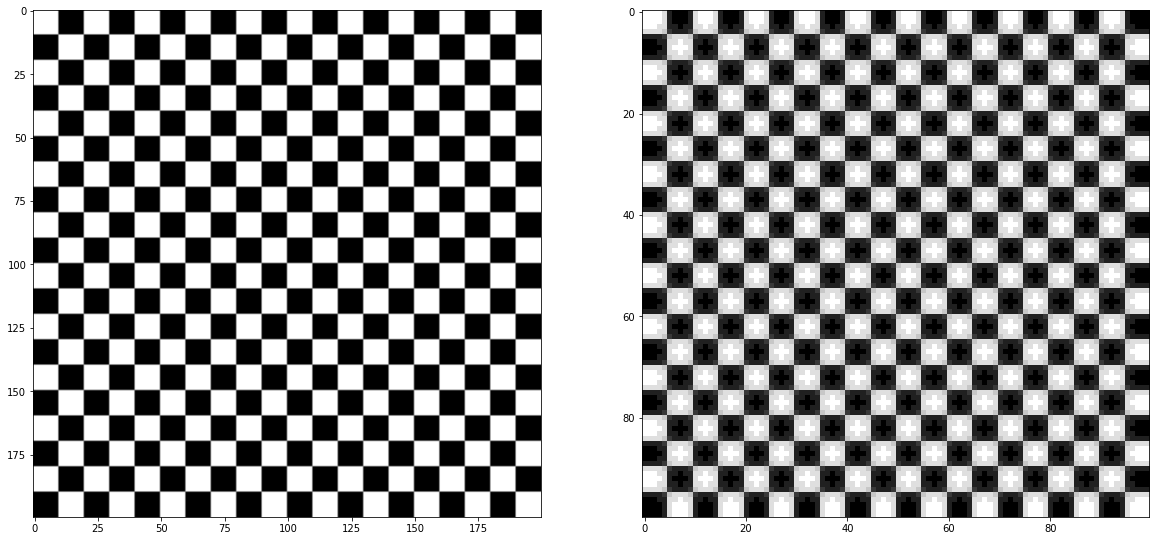

In [106]:
fields = int(20/2)
size = 10
compose = transforms.Compose([
#     transforms.CenterCrop(125),
#     transforms.RandomHorizontalFlip(.5),
#     transforms.RandomVerticalFlip(.5),
#     transforms.RandomRotation(10),
#     transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=0),
#     Cutout(p=.5),
#     AutoContrast(),
#     PseudorandomPixelPlacement(),
#     transforms.ToPILImage(),
    transforms.Resize(100),
    MedianUnsharpFilter(size=1,amount=1),
    MedianHSVFilter(size=3)
])
fields = int(20/2)
size = 10
binary_image = np.kron([[1, 0] * fields, [0, 1] * fields] * fields, np.ones((size, size)))

# Convert the binary image to an RGB image
rgb_image = np.stack((binary_image, binary_image, binary_image), axis=-1)

# Display the RGB image using matplotlib
f,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(rgb_image)
ax[1].imshow(compose(ToPILImage()(ToTensor()(rgb_image))))

plt.show()

In [5]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
img = image_file.convert('RGB')

0.04570579528808594

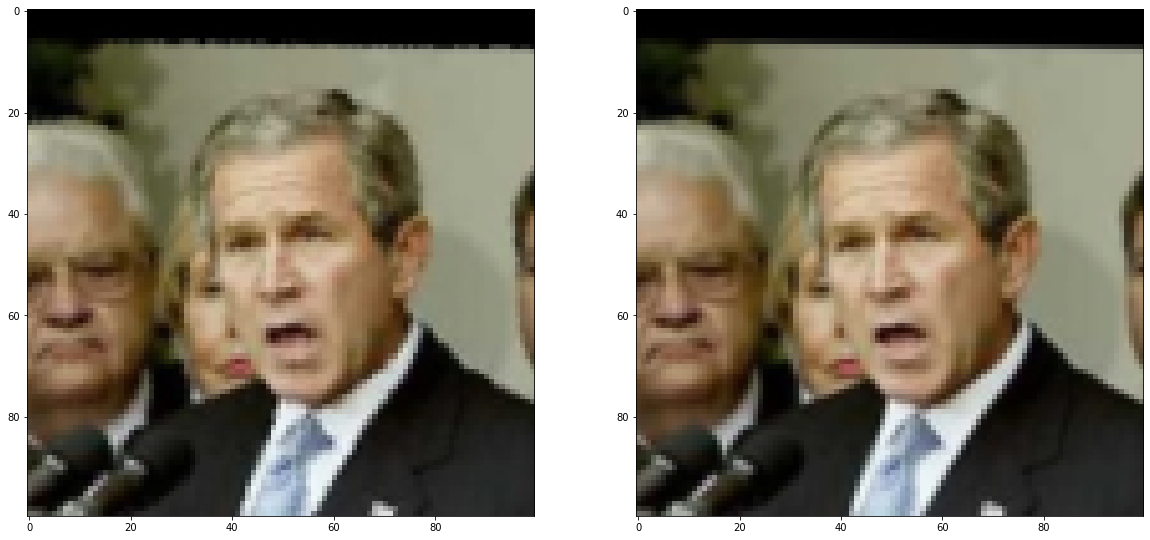

In [3]:
then=time.time()
f,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(transforms.Resize(100)(transforms.ToPILImage()(PseudorandomPixelPlacement()(img))))
ax[1].imshow(transforms.Resize(100)(img))
time.time()-then

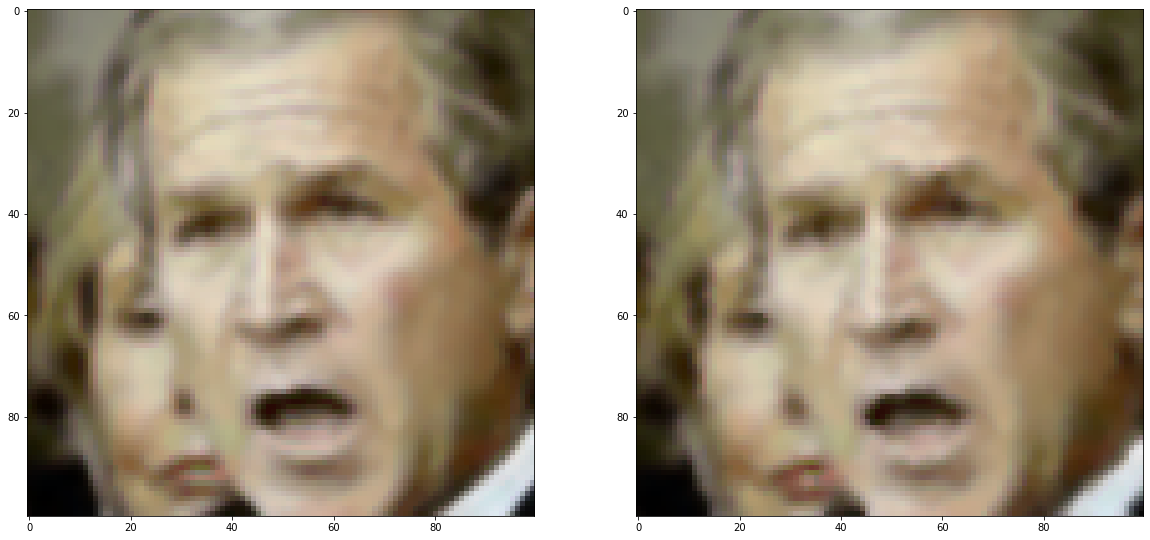

In [23]:
compose = transforms.Compose([
    transforms.CenterCrop(125),
#     transforms.RandomHorizontalFlip(.5),
#     transforms.RandomVerticalFlip(.5),
#     transforms.RandomRotation(180),
#     transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=0),
#     Cutout(p=.5),
    AutoContrast(),
#     PseudorandomPixelPlacement(),
#     transforms.ToPILImage(),
    transforms.Resize(100),
    MedianUnsharpFilter(size=1,amount=1),
    MedianFilter(size=3)
])
compose2 = transforms.Compose([
    transforms.CenterCrop(125),
#     transforms.RandomHorizontalFlip(.5),
#     transforms.RandomVerticalFlip(.5),
#     transforms.RandomRotation(180),
#     transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=0),
#     Cutout(p=.5),
    AutoContrast(),
    PseudorandomPixelPlacement(),
#     transforms.ToPILImage(),
    transforms.Resize(100),
    MedianUnsharpFilter(size=1,amount=1),
    MedianFilter(size=3)
])
f,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(compose(img))
ax[1].imshow(compose2(img))

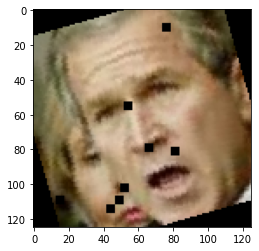

In [9]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
img = image_file.convert('RGB')
plt.imshow(Cutout(max_h_size=5, max_w_size=5)(transforms.RandomRotation(180)(transforms.CenterCrop(125)(img))))

In [54]:
import torch
from torch.utils.data import random_split

def split(full_dataset, val_percent, test_percent, random_seed=None):
    amount = len(full_dataset)

    test_amount = (
        int(amount * test_percent)
        if test_percent is not None else 0)
    val_amount = (
        int(amount * val_percent)
        if val_percent is not None else 0)
    train_amount = amount - test_amount - val_amount

    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset,
        (train_amount, val_amount, test_amount),
        generator=(
            torch.Generator().manual_seed(random_seed)
            if random_seed
            else None))
    
    return train_dataset, val_dataset, test_dataset

full_dataset = make_dataset('LFW', split='10fold', image_size=100)
train_dataset, val_dataset, test_dataset = split(full_dataset, 0.0, 0.3, 1)

Files already downloaded and verified


In [23]:
dataset = make_dataset('LFWCustom', face_detection=False,split='train',image_size=100)
# [(c,len(face_recognition.face_locations(np.array(transforms.ToPILImage()(x))))) for c,x in enumerate([y[0] for y in dataset[:1000]]) if len(face_recognition.face_locations(np.array(transforms.ToPILImage()(x))))==0]

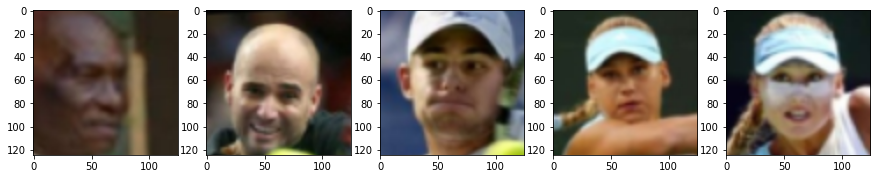

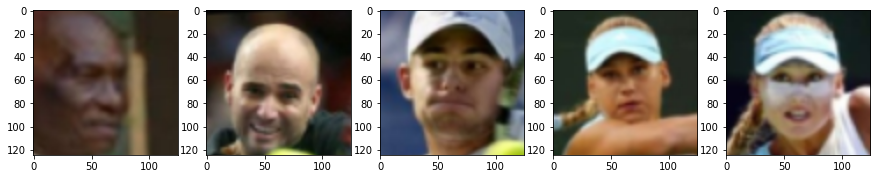

In [35]:
c=0
for i in [4,229,255,293,295]+[4,229,255,293,295]:
    if c==0:
        f, ax = plt.subplots(1,5,figsize=(3*5,3))
    ax[c].imshow(transforms.CenterCrop(125)(transforms.Resize((200,200))(transforms.ToPILImage()(dataset[i][0]))))
#     ax[c].imshow(transforms.CenterCrop(125)(transforms.Resize((200,200))(AutoContrast()(transforms.ToPILImage()(dataset[i][0])))))
    c+=1
    if c==5:
        c=0
        plt.show()
    

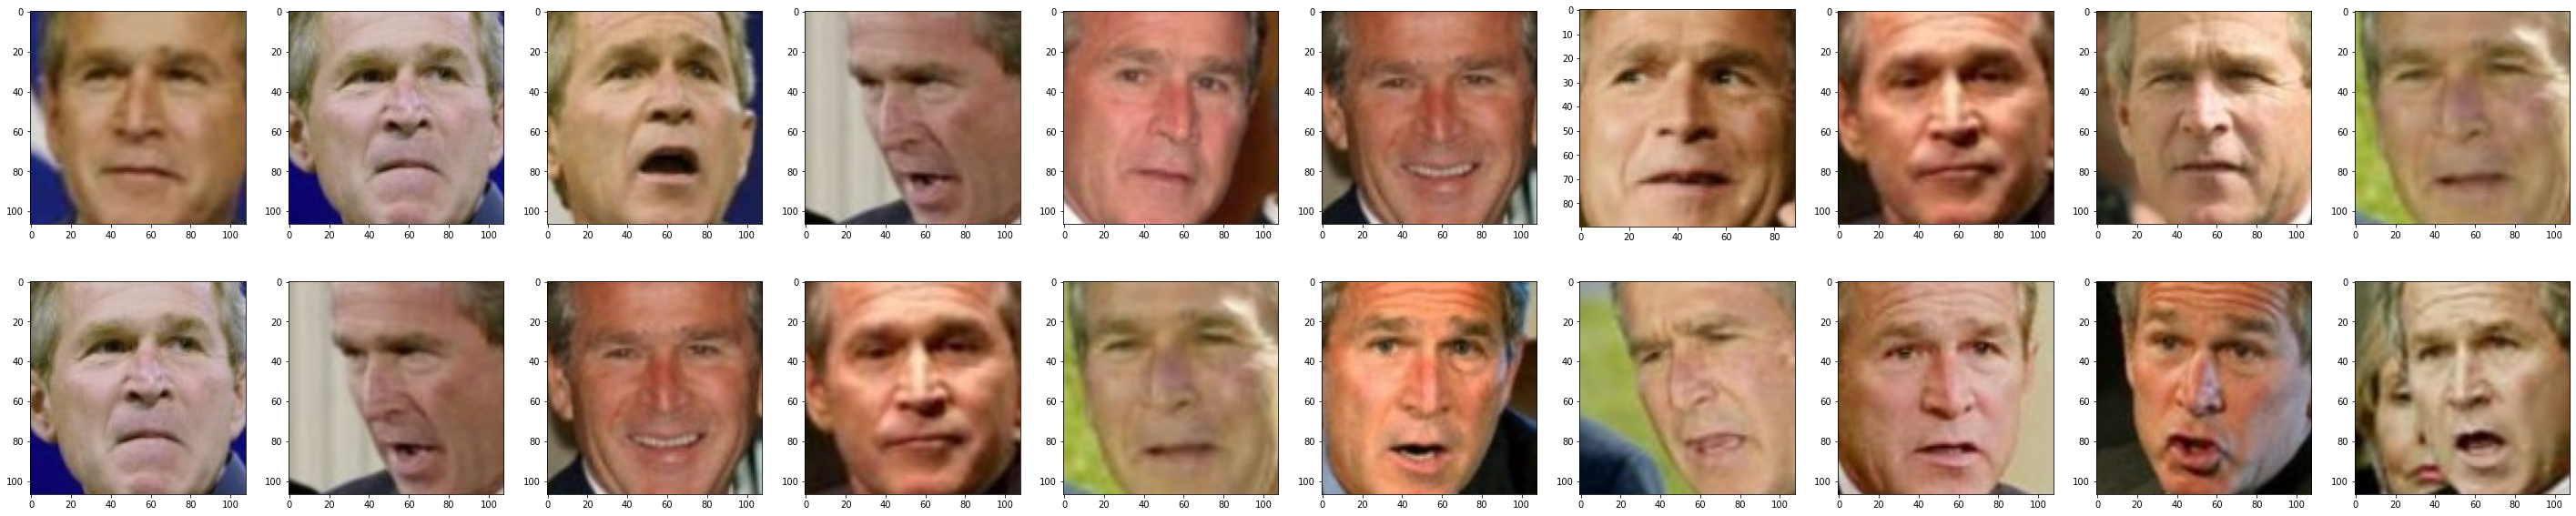

In [11]:
f,ax = plt.subplots(2,10, figsize=(50,10))

for j in range(2):
    for i in range(10):
        image_file = Image.open(f'./Clean/data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_00{(i+1)*(j+1):02d}.jpg')
        img = image_file.convert('RGB')
        face_locations = face_recognition.face_locations(np.array(img))
        U,R,D,L = face_locations[0]
        ax[j,i].imshow(img.crop([L,U,R,D]))

In [16]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
img = image_file.convert('RGB')
np.max(MedianUnsharpFilter(size=3,amount=2)(img))
# np.max(MedianHSVFilter(size=3)(img))
np.max(skimage.color.hsv2rgb(skimage.color.rgb2hsv(np.array(img))))

1.0

time:0.030013084411621094


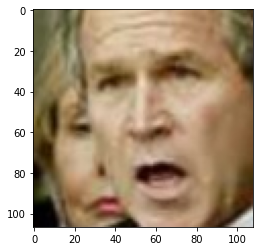

In [69]:
then=time.time()
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
img = image_file.convert('RGB')
face_locations = face_recognition.face_locations(np.array(img))
print(f'time:{time.time()-then}')
U,R,D,L = face_locations[0]
plt.imshow(img.crop([L,U,R,D]))

time:0.0001647472381591797


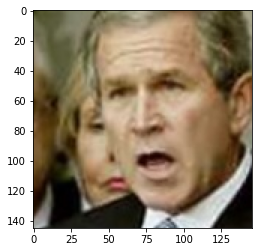

In [81]:
then=time.time()
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
img = image_file.convert('RGB')
face_locations = face_recognition.face_locations(np.array(img))

# Your existing code to calculate face_locations
U, R, D, L = face_locations[0]
then=time.time()
# Calculate the width and height
width = R - L
height = D - U

# Define the scaling factor (e.g., 120% for a 20% increase)
scaling_factor = 1.35  # 120%

# Scale the width and height
new_width = width * scaling_factor
new_height = height * scaling_factor

# Calculate the new left (L) and top (U) coordinates
new_L = L - (new_width - width) / 2
new_U = U - (new_height - height) / 2

# Calculate the new right (R) and bottom (D) coordinates
new_R = new_L + new_width
new_D = new_U + new_height
print(f'time:{time.time()-then}')
# Display the scaled image region
plt.imshow(img.crop((new_L, new_U, new_R, new_D)))

time:0.015029191970825195


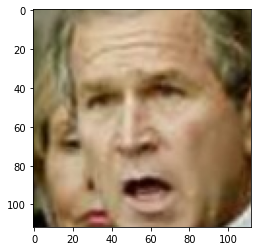

In [67]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
then=time.time()
img = cv2.imread('./Clean/data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
face = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
print(f'time:{time.time()-then}')
x,y,w,h=face[0]
img = image_file.convert('RGB')
plt.imshow(img.crop([x,y,x+w,y+h]))

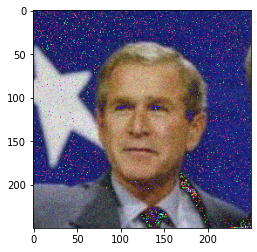

In [71]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0001.jpg')
img = image_file.convert('RGB')
then=time.time()
x=transforms.ToTensor()(img)
x= x + .2*((0.1**0.5)*torch.randn(3, 250, 250))
time.time()-then
plt.imshow(transforms.ToPILImage()(x))
# plt.imshow(RandomNoise()(x))

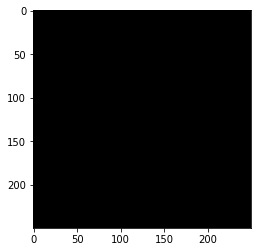

In [47]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0001.jpg')
img = image_file.convert('RGB')
img = np.array(img)
plt.imshow(AutoContrast()(img/255 - (MedianUnsharpFilter(size=1)(img))))

In [22]:
def logtime(then):
    print(time.time()-then)
    return time.time()

image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0001.jpg')
img = image_file.convert('RGB')
then=time.time()
img = transforms.CenterCrop(125)(img)
then=logtime(then)
img = transforms.RandomHorizontalFlip(.5)(img)
then=logtime(then)
img = transforms.ColorJitter(brightness=.5, contrast=.5, saturation=.5, hue=.5)(img)
then=logtime(then)
img = GaussianBlur(sigma=3)(img)
then=logtime(then)
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0001.jpg')
img = image_file.convert('RGB')
then=logtime(then)
img = transforms.GaussianBlur(3)(img)
then=logtime(then)
img = AutoContrast()(img)
then=logtime(then)
img = MedianUnsharpFilter(size=1,amount=1)(img)
then=logtime(then)
img = MedianHSVFilter(method='sv',size=3)(img)
then=logtime(then)

0.0001990795135498047
0.0003561973571777344
0.09073305130004883
0.001878976821899414
0.0007433891296386719
0.013072490692138672
0.0006439685821533203
0.39803266525268555
0.18846774101257324


In [99]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0001.jpg')
img = image_file.convert('RGB')
then=time.time()
transforms.GaussianBlur(1)(img)
time.time()-then
plt.imshow()

0.19911742210388184

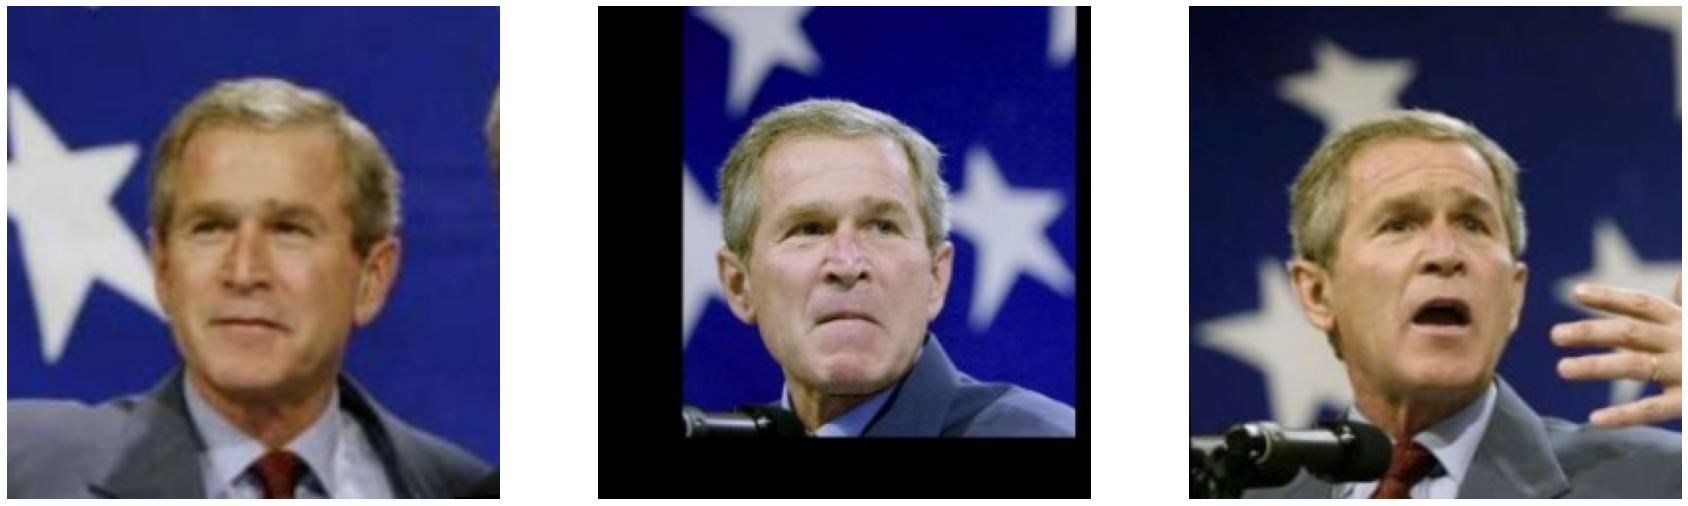

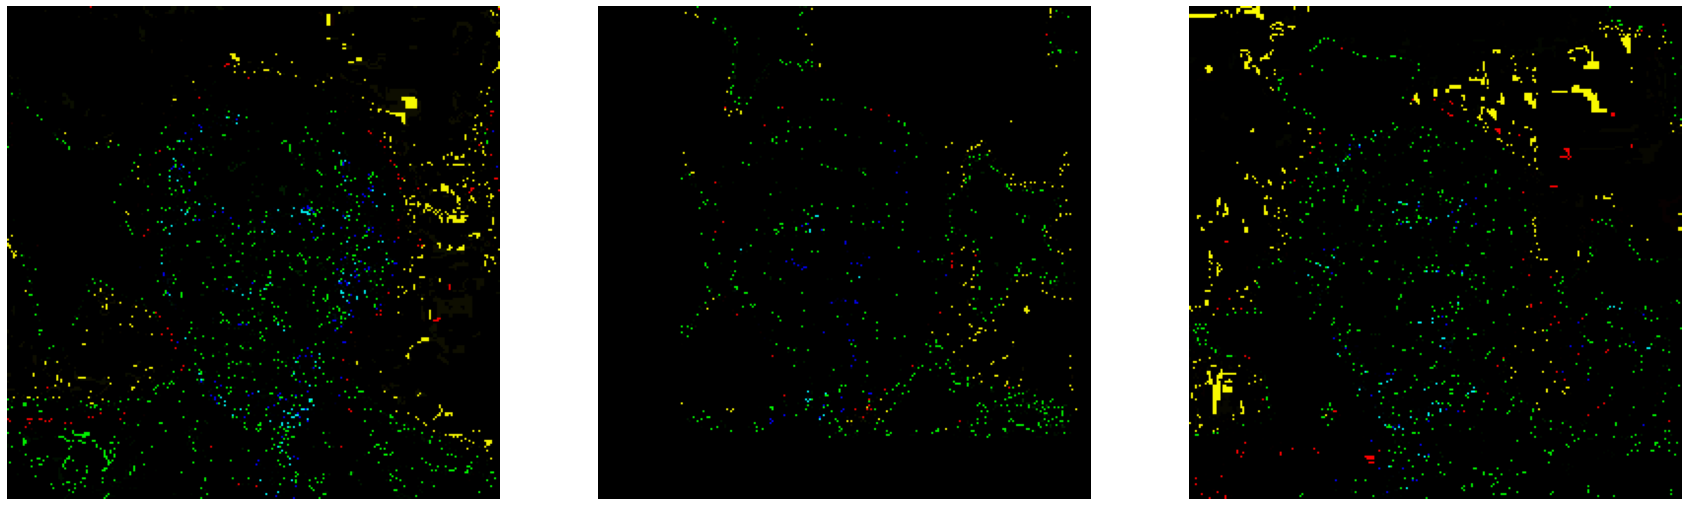

In [7]:
f,ax=plt.subplots(1,3,figsize=(30,10))
f2,ax2=plt.subplots(1,3,figsize=(30,10))
for i in range(1,4):
    image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_000{i}.jpg')
    img = image_file.convert('RGB')
    img = np.array(img)
    ax[i-1].imshow(img)
    ax[i-1].set_axis_off()
    ax2[i-1].imshow(AutoContrast()((MedianHSVFilter(size=3)(img) - MedianHSVFilter(size=3)(MedianUnsharpFilter(size=1,amount=1)((img))))*10**15))
    ax2[i-1].set_axis_off()
plt.show()

In [26]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_00{(i+1)*(j+1):02d}.jpg')
img = image_file.convert('RGB')
img.size

(250, 250)

Files already downloaded and verified


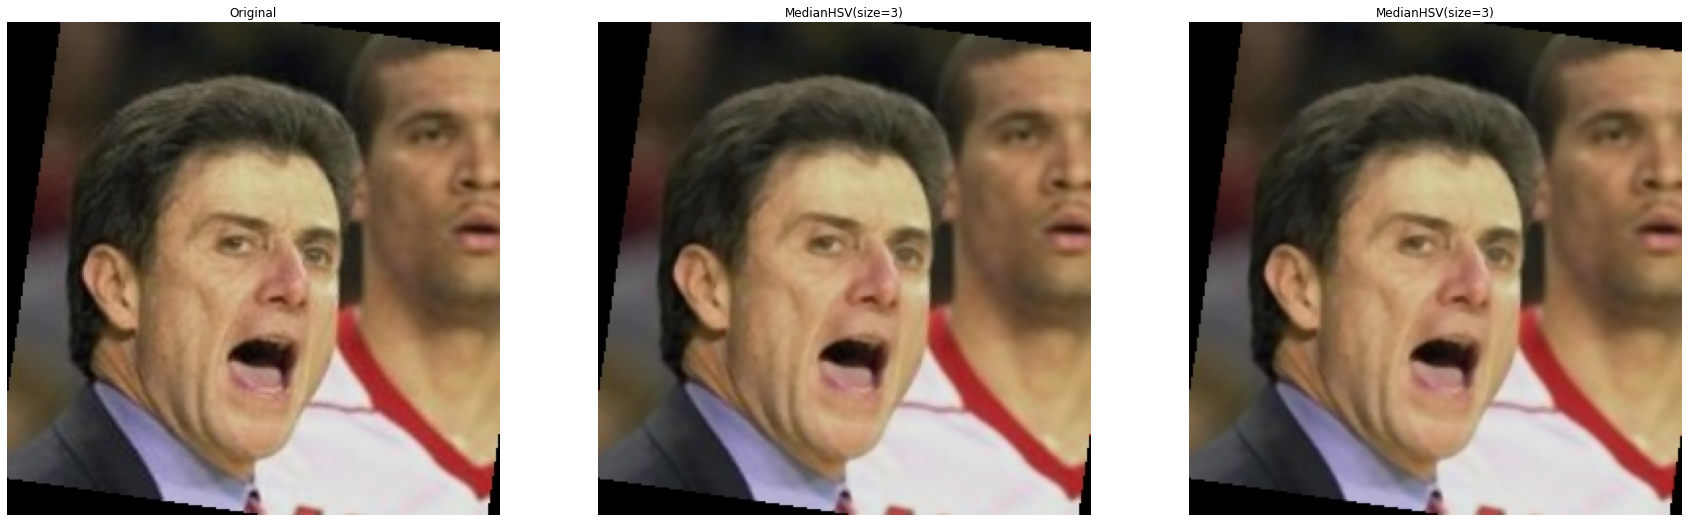

In [27]:
i,j=0,0
musize,muamount=1,1
method='sv'
msize=3
dataset = make_dataset('LFW', face_detection=False,split='10fold',image_size=100)
image_file = Image.open(dataset.data[np.random.randint(len(dataset))])
img = image_file.convert('RGB')
f,ax=plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_axis_off()
filtered_img = MedianHSVFilter(method='v',size=msize)(MedianUnsharpFilter(size=musize,amount=muamount)(img))
ax[1].imshow(filtered_img)
ax[1].set_title(f'MedianHSV(size={msize})')
ax[1].set_axis_off()
filtered_img = MedianHSVFilter(method=method,size=msize)(MedianUnsharpFilter(size=musize,amount=muamount)(img))
ax[2].imshow(filtered_img)
ax[2].set_title(f'MedianHSV(size={msize})')
ax[2].set_axis_off()
plt.show()

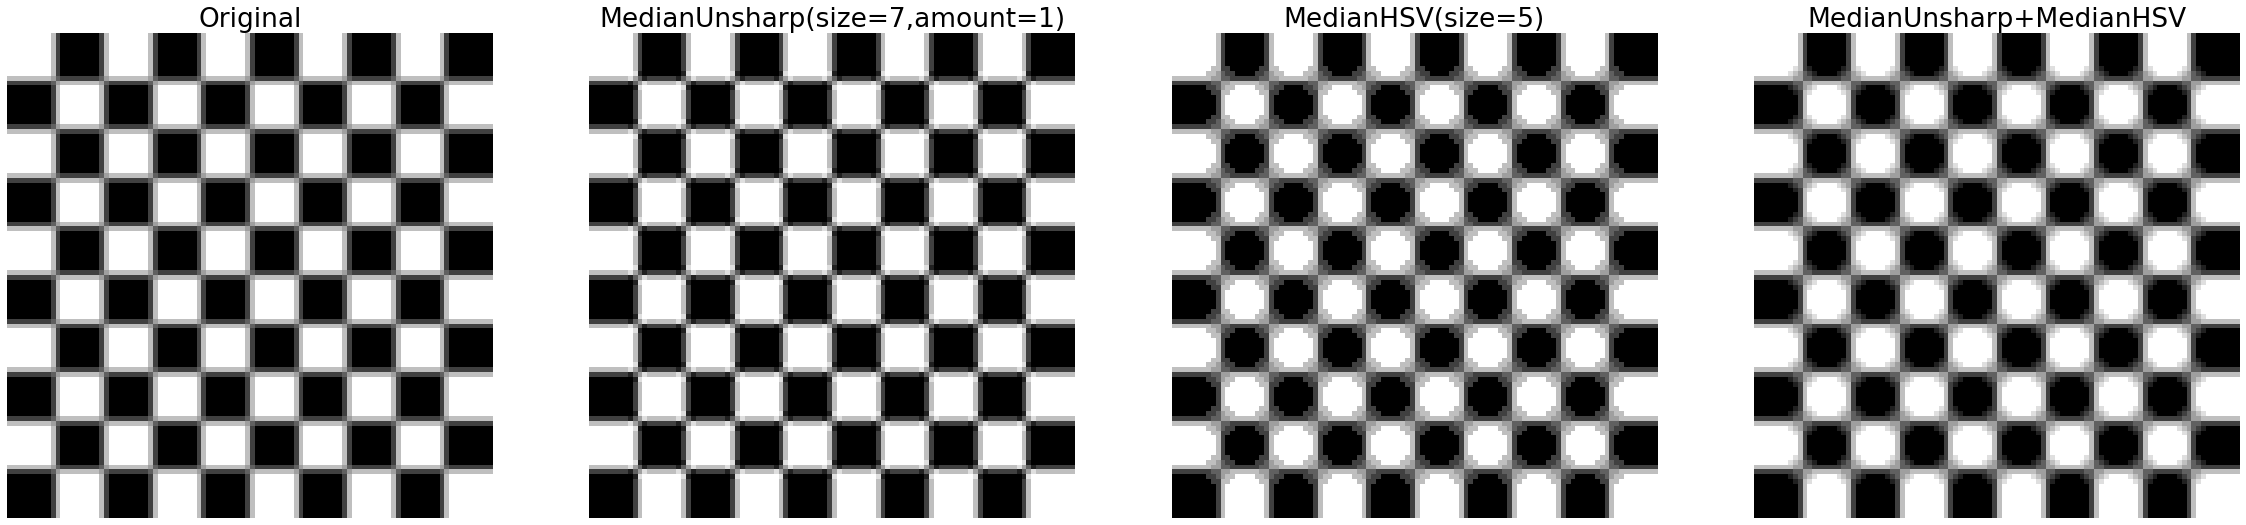

In [123]:
fields = int(10/2)
size = 5
musize,muamount,method,msize=7,1,'sv',5
binary_image = np.kron([[1, 0] * fields, [0, 1] * fields] * fields, np.ones((size, size)))

# Convert the binary image to an RGB image
img = np.stack((binary_image, binary_image, binary_image), axis=-1)
img = transforms.Resize(100)(transforms.ToPILImage()(transforms.ToTensor()(img)))
plt.rcParams.update({'font.size':22})
f,ax=plt.subplots(1,4,figsize=(40,10))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_axis_off()
filtered_img = MedianUnsharpFilter(size=musize,amount=muamount)(img)
ax[1].imshow(filtered_img)
ax[1].set_title(f'MedianUnsharp(size={musize},amount={muamount})')
ax[1].set_axis_off()

filtered_img = MedianHSVFilter(method=method,size=msize)(img)
ax[2].imshow(filtered_img)
ax[2].set_title(f'MedianHSV(size={msize})')
ax[2].set_axis_off()

filtered_img = MedianHSVFilter(method=method,size=msize)(MedianUnsharpFilter(size=musize,amount=muamount)(img))
ax[3].imshow(filtered_img)
ax[3].set_title(f'MedianUnsharp+MedianHSV')
ax[3].set_axis_off()
plt.show()

In [128]:
dataset=make_dataset('LFW',split='10fold')

Files already downloaded and verified


In [130]:
dir(dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_get_classes',
 '_get_path',
 '_get_people',
 '_is_protocol',
 '_loader',
 '_repr_indent',
 'annot_file',
 'base_folder',
 'checksums',
 'class_to_idx',
 'data',
 'download',
 'download_url_prefix',
 'extra_repr',
 'file_dict',
 'filename',
 'functions',
 'image_set',
 'images_dir',
 'labels_file',
 'md5',
 'names',
 'register_datapipe_as_function',
 'register_function',
 'root',
 'split',
 'target_transform',
 'targets',
 'tr

In [161]:
remove(image_file)

TypeError: retrieve() got an unexpected keyword argument 'progressbar'

In [158]:
from rembg import remove
i=0
musize,muamount=7,1
method='sv'
msize=5
image_file = Image.open(dataset._get_people()[0][np.random.randint(0,len(dataset))]))
img = image_file.convert('RGB')
for center_crop in range(2):
    f,ax=plt.subplots(1,4,figsize=(40,10))
    ax[0].imshow(img)
    ax[0].set_title('Original')
    ax[0].set_axis_off()
    filtered_img = MedianUnsharpFilter(size=musize,amount=muamount)(img)
    ax[1].imshow(filtered_img)
    ax[1].set_title(f'MedianUnsharp(size={musize},amount={muamount})')
    ax[1].set_axis_off()

    filtered_img = MedianHSVFilter(method=method,size=msize)(img)
    ax[2].imshow(filtered_img)
    ax[2].set_title(f'MedianHSV(size={msize})')
    ax[2].set_axis_off()
    filtered_img = MedianHSVFilter(method=method,size=msize)(MedianUnsharpFilter(size=musize,amount=muamount)(img))
    ax[3].imshow(filtered_img)
    ax[3].set_title(f'MedianUnsharp+MedianHSV')
    ax[3].set_axis_off()
    plt.show()
    f,ax=plt.subplots(1,3,figsize=(20,10))
    filtered_img = AutoContrast()(img)
    ax[0].imshow(filtered_img)
    ax[0].set_title('AutoCon')
    ax[0].set_axis_off()
    filtered_img = MedianUnsharpFilter(size=musize,amount=muamount)(filtered_img)
    ax[1].imshow(filtered_img)
    ax[1].set_title(f'AutoCon+MedianUnsharp(size={musize},amount={muamount})')
    ax[1].set_axis_off()
    filtered_img = MedianHSVFilter(method=method,size=msize)(filtered_img)
    ax[2].imshow(filtered_img)
    ax[2].set_title(f'AutoCon+MedianUnsharp(size={musize},amount={muamount})+MedianHSV(size={msize})')
    ax[2].set_axis_off()
    plt.show()
    img = transforms.CenterCrop(size=125)(img)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


TypeError: retrieve() got an unexpected keyword argument 'progressbar'

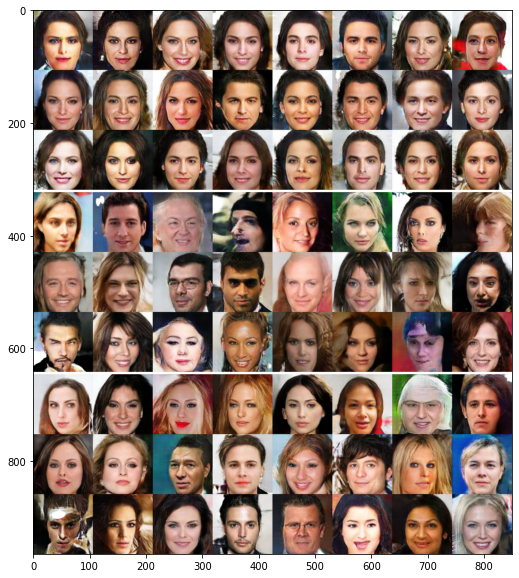

In [68]:
image_file = Image.open(f'./CelebA-Example-8x9.png').convert('RGB')
f, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_file)

time: 0.4235846996307373


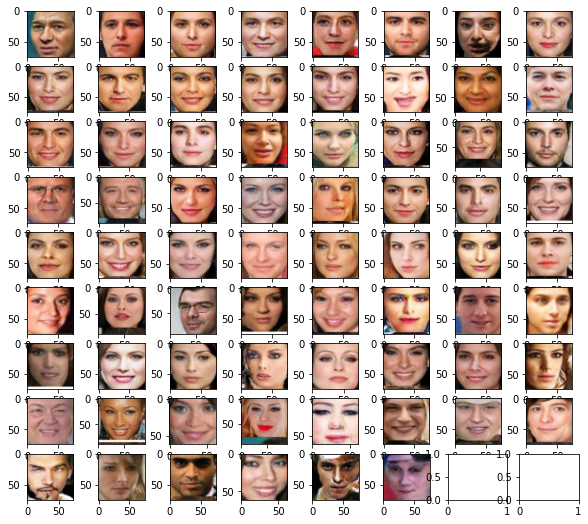

In [82]:
image_file = transforms.Resize((1000,1000))(Image.open(f'./CelebA-Example-8x9.png').convert('RGB'))
then=time.time()
face_locations = face_recognition.face_locations(np.array(image_file))
print(f'time: {time.time()-then}')
# f, ax = plt.subplots(8+1,(len(face_locations)+1)//8, figsize=(10, (len(face_locations)+1)//8))
f, ax = plt.subplots(8+1,8, figsize=(10, 9))
c=0
i=0
for (U,R,D,L) in face_locations:
#     if i == (len(face_locations)+1)//8:
    if i == 8:
        c+=1
        i=0
    ax[c,i].imshow(image_file.crop([L,U,R,D]))
    i+=1
f.show()

time: 0.07161784172058105


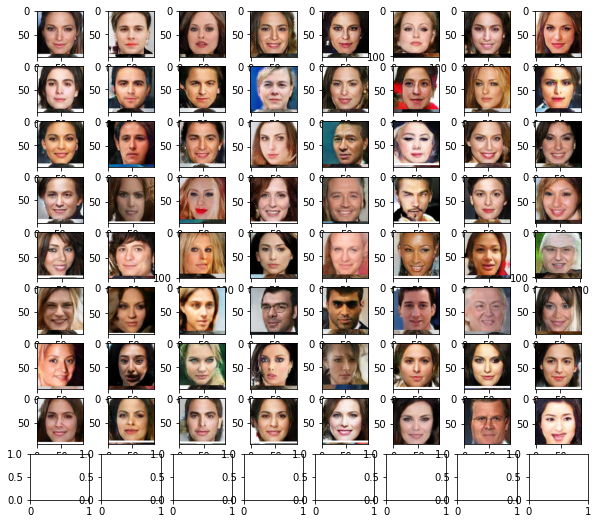

In [26]:
img = cv2.imread('./CelebA-Example-8x9.png')
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
then=time.time()
face_locations = face_classifier.detectMultiScale(
    img, scaleFactor=1.1, minNeighbors=5, minSize=(90, 90)
)
print(f'time: {time.time()-then}')
# f, ax = plt.subplots(8+1,(len(face_locations)+1)//8, figsize=(10, (len(face_locations)+1)//8))
f, ax = plt.subplots(9,8, figsize=(10, 9))
c=0
i=0
for (x,y,w,h) in face_locations:
    L,U,R,D=x,y,x+w,y+h
#     if i == (len(face_locations)+1)//8:
    if i == 8:
        c+=1
        i=0
    ax[c,i].imshow(Image.fromarray(img[:,:,::-1]).crop([L,U,R,D]))
    i+=1
f.show()



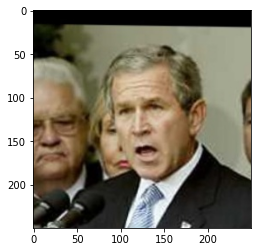

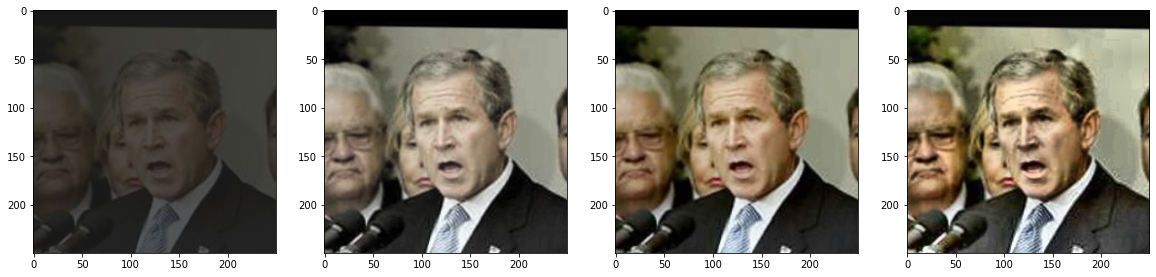

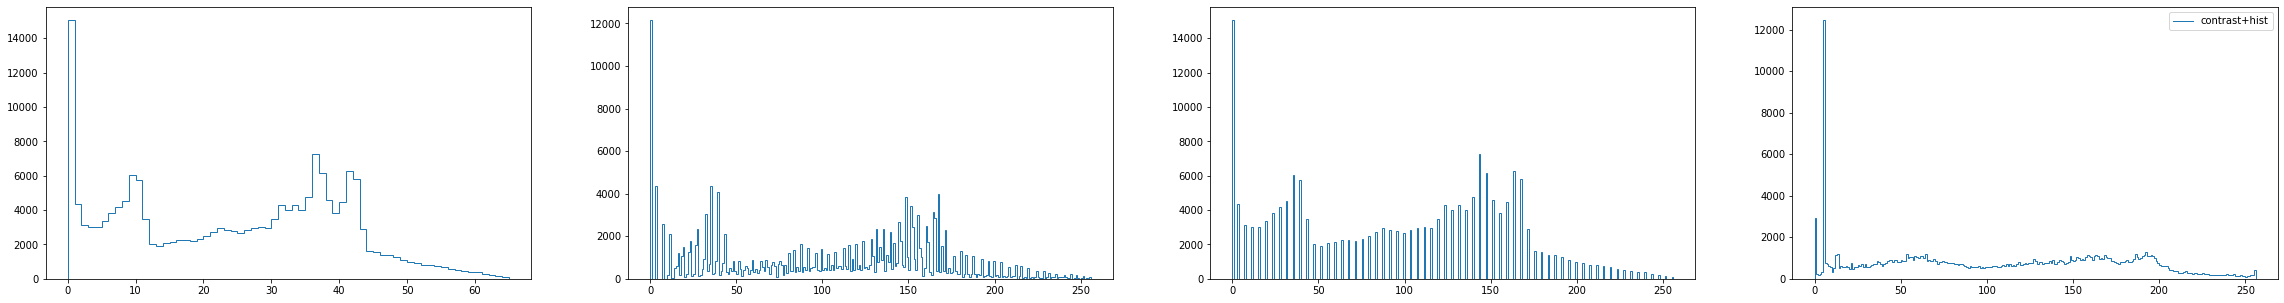

In [56]:
image_file = Image.open(f'./data/lfw-py/lfw_funneled/George_W_Bush/George_W_Bush_0020.jpg')
img = image_file.convert('RGB')
plt.imshow(img)
plt.show()
filtered_img = img
filtered_img = transforms.functional.adjust_brightness(filtered_img,.5)
filtered_img = transforms.functional.adjust_contrast(filtered_img,.5)
# filtered_img = transforms.functional.adjust_saturation(filtered_img,.5)

f,ax=plt.subplots(1,4,figsize=(20,10))
ax[0].imshow(filtered_img)
ax[1].imshow(HistogramEqualization()(filtered_img))
ax[2].imshow(AutoContrast()(filtered_img))
ax[3].imshow(HistogramEqualization(clip_limit=.025)(AutoContrast()(filtered_img)))
plt.show()
f,ax=plt.subplots(1,4,figsize=(40,5))
ax[0].stairs(skimage.exposure.histogram(np.array(filtered_img), nbins=256)[0], label='filtered')
ax[1].stairs(skimage.exposure.histogram(HistogramEqualization()(filtered_img), nbins=256)[0], label='hist')
ax[2].stairs(skimage.exposure.histogram(AutoContrast()(filtered_img), nbins=256)[0], label='contrast')
ax[3].stairs(skimage.exposure.histogram(HistogramEqualization(clip_limit=.025)(AutoContrast()(filtered_img)), nbins=256)[0], label='contrast+hist')
plt.legend()
plt.show()

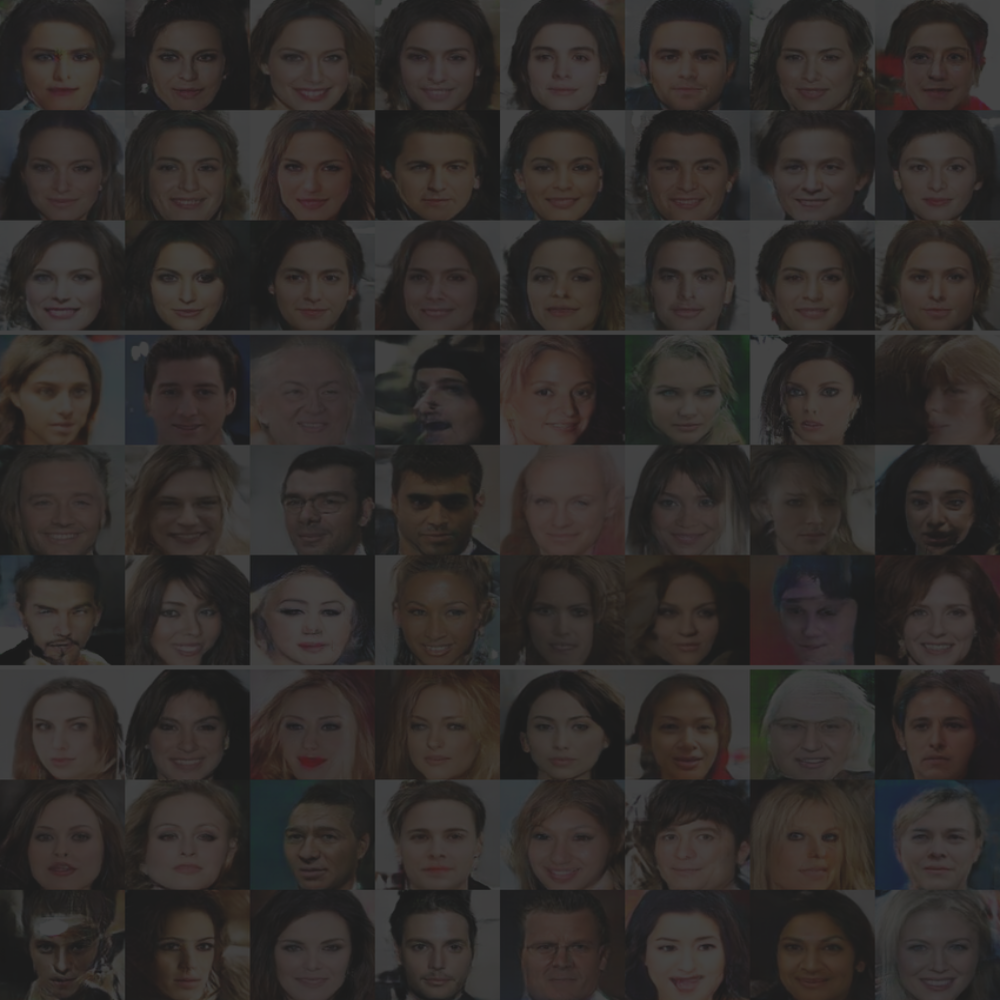

In [7]:
image_file = transforms.Resize((1000,1000))(Image.open(f'../CelebA-Example-8x9.png').convert('RGB'))

time: 0.4153118133544922


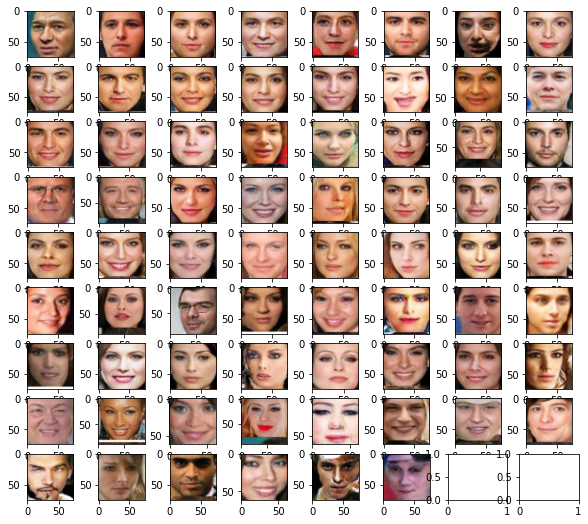

In [20]:
image_file = transforms.Resize((1000,1000))(Image.open(f'../CelebA-Example-8x9.png').convert('RGB'))
filtered_image_file = transforms.functional.adjust_brightness(transforms.functional.adjust_contrast(image_file,.4),.4)
then=time.time()
face_locations = face_recognition.face_locations(np.array(image_file))
print(f'time: {time.time()-then}')
# f, ax = plt.subplots(8+1,(len(face_locations)+1)//8, figsize=(10, (len(face_locations)+1)//8))
f, ax = plt.subplots(8+1,8, figsize=(10, 9))
c=0
i=0
for (U,R,D,L) in face_locations:
#     if i == (len(face_locations)+1)//8:
    if i == 8:
        c+=1
        i=0
    ax[c,i].imshow(image_file.crop([L,U,R,D]))
    i+=1
f.show()

time: 0.41256070137023926


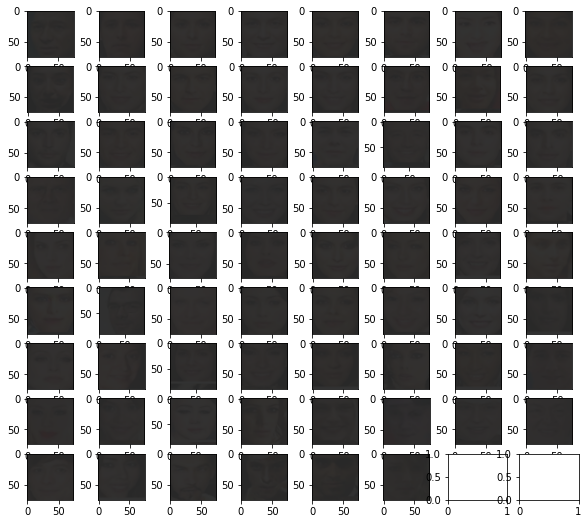

In [28]:
image_file = transforms.Resize((1000,1000))(Image.open(f'../CelebA-Example-8x9.png').convert('RGB'))
filtered_image_file = transforms.functional.adjust_brightness(transforms.functional.adjust_contrast(image_file,.1),.4)
adjusted_image_file = transforms.ToPILImage()(AutoContrast()(filtered_image_file))
then=time.time()
face_locations = face_recognition.face_locations(np.array(adjusted_image_file))
print(f'time: {time.time()-then}')
# f, ax = plt.subplots(8+1,(len(face_locations)+1)//8, figsize=(10, (len(face_locations)+1)//8))
f, ax = plt.subplots(8+1,8, figsize=(10, 9))
c=0
i=0
for (U,R,D,L) in face_locations:
#     if i == (len(face_locations)+1)//8:
    if i == 8:
        c+=1
        i=0
    ax[c,i].imshow(filtered_image_file.crop([L,U,R,D]))
    i+=1
f.show()